In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [39]:
df = pd.read_csv("data/vehicles_messy.csv")

/Users/felipe/miniconda3/envs/ironhack/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37832 entries, 0 to 37842
Data columns (total 85 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        37832 non-null  float64
 1   barrelsA08       37832 non-null  float64
 2   charge120        37832 non-null  float64
 3   charge240        37832 non-null  float64
 4   city08           37832 non-null  int64  
 5   city08U          37832 non-null  float64
 6   cityA08          37832 non-null  int64  
 7   cityA08U         37832 non-null  float64
 8   cityCD           37832 non-null  float64
 9   cityE            37832 non-null  float64
 10  cityUF           37832 non-null  float64
 11  co2              37832 non-null  int64  
 12  co2A             37832 non-null  int64  
 13  co2TailpipeAGpm  37832 non-null  float64
 14  co2TailpipeGpm   37832 non-null  float64
 15  comb08           37832 non-null  int64  
 16  comb08U          37832 non-null  float64
 17  combA08     

In [40]:
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [41]:
df.shape

(37843, 83)

In [160]:
nulls = df.isnull().sum().sort_values(ascending=False)
nulls[nulls == 0]

combA08        0
fuelCost08     0
fuelCostA08    0
fuelType       0
fuelType1      0
              ..
mpgData        0
phevBlended    0
pv2            0
pv4            0
barrels08      0
Length: 68, dtype: int64

In [43]:
df["trany"].value_counts()

Automatic 4-spd                     11042
Manual 5-spd                         8311
Automatic 3-spd                      3151
Automatic (S6)                       2638
Manual 6-spd                         2429
Automatic 5-spd                      2184
Manual 4-spd                         1483
Automatic 6-spd                      1432
Automatic (S8)                        960
Automatic (S5)                        824
Automatic (variable gear ratios)      681
Automatic 7-spd                       663
Automatic (S7)                        261
Auto(AM-S7)                           256
Automatic 8-spd                       243
Automatic (S4)                        233
Auto(AM7)                             160
Auto(AV-S6)                           145
Auto(AM6)                             110
Automatic (A1)                        109
Auto(AM-S6)                            92
Automatic 9-spd                        90
Manual 3-spd                           77
Manual 7-spd                      

In [44]:
with pd.option_context("display.max_rows",None, "display.max_columns",None):
    display(df[df["trany"].isnull()].iloc[0])

barrels08                                  0.24
barrelsA08                                    0
charge120                                     0
charge240                                     0
city08                                       81
city08U                                       0
cityA08                                       0
cityA08U                                      0
cityCD                                        0
cityE                                        41
cityUF                                        0
co2                                           0
co2A                                         -1
co2TailpipeAGpm                               0
co2TailpipeGpm                                0
comb08                                       85
comb08U                                       0
combA08                                       0
combA08U                                      0
combE                                        40
combinedCD                              

In [45]:
df = df[~df["trany"].isnull()]

In [46]:
tra = {"A":True,"M":False}
for k,v in tra.items():
    df.loc[df["trany"].str.startswith(k),"auto"] = v

In [48]:
df.auto.value_counts()

True     25443
False    12389
Name: auto, dtype: int64

In [61]:
def speed(x):
    speed = "".join([e for e in x if e.isnumeric()])
    if speed:
        return int(speed)
    return np.nan
df["speed"] = df.trany.apply(speed)

In [62]:
df[["auto","speed"]]

,auto,speed
0,False,5.0
1,False,5.0
2,False,5.0
3,True,3.0
4,False,5.0
...,...,...
37838,True,4.0
37839,False,5.0
37840,True,4.0
37841,False,5.0


In [64]:
df["speed"].value_counts(dropna=False)

4.0    12777
5.0    11334
6.0     6862
3.0     3230
7.0     1474
8.0     1241
NaN      687
9.0      117
1.0      110
Name: speed, dtype: int64

In [161]:
df_clean = df[["make","model","auto","speed","year", "cylinders","hpv"]]

In [153]:
df_clean.head()

,make,model,auto,speed,year,cylinders,co2
0,Alfa Romeo,Spider Veloce 2000,False,5.0,1985,4.0,-1
1,Ferrari,Testarossa,False,5.0,1985,12.0,-1
2,Dodge,Charger,False,5.0,1985,4.0,-1
3,Dodge,B150/B250 Wagon 2WD,True,3.0,1985,8.0,-1
4,Subaru,Legacy AWD Turbo,False,5.0,1993,4.0,-1


In [154]:
df_clean.isnull().sum()

make           0
model          0
auto           0
speed        687
year           0
cylinders    114
co2            0
dtype: int64

In [101]:
df_clean.make.value_counts()

Chevrolet                             3795
Ford                                  3098
Dodge                                 2513
GMC                                   2388
Toyota                                1915
                                      ... 
General Motors                           1
Qvale                                    1
Isis Imports Ltd                         1
S and S Coach Company  E.p. Dutton       1
Grumman Allied Industries                1
Name: make, Length: 133, dtype: int64

In [102]:
expensive = ["Audi", "Ferrari", "Mercedes"]

In [103]:
df_clean[df_clean["make"].isin(expensive)]

,make,model,auto,speed,year,cylinders
1,Ferrari,Testarossa,False,5.0,1985,12.0
18,Audi,100,True,4.0,1993,6.0
19,Audi,100,False,5.0,1993,6.0
156,Audi,100 quattro Wagon,True,4.0,1993,6.0
700,Ferrari,Ferrari 348 TB/TS/Spider,False,5.0,1994,8.0
...,...,...,...,...,...,...
37715,Audi,S4,False,5.0,1993,5.0
37716,Audi,100 quattro,True,4.0,1993,6.0
37717,Audi,100 quattro,False,5.0,1993,6.0
37718,Audi,90,True,4.0,1993,6.0


In [104]:
df_clean["expensive"] = np.where(df_clean["make"].isin(expensive),"expensive","not-expensive")

/Users/felipe/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
df_clean

,make,model,auto,speed,year,cylinders,expensive
0,Alfa Romeo,Spider Veloce 2000,False,5.0,1985,4.0,not-expensive
1,Ferrari,Testarossa,False,5.0,1985,12.0,expensive
2,Dodge,Charger,False,5.0,1985,4.0,not-expensive
3,Dodge,B150/B250 Wagon 2WD,True,3.0,1985,8.0,not-expensive
4,Subaru,Legacy AWD Turbo,False,5.0,1993,4.0,not-expensive
...,...,...,...,...,...,...,...
37838,Subaru,Legacy,True,4.0,1993,4.0,not-expensive
37839,Subaru,Legacy,False,5.0,1993,4.0,not-expensive
37840,Subaru,Legacy AWD,True,4.0,1993,4.0,not-expensive
37841,Subaru,Legacy AWD,False,5.0,1993,4.0,not-expensive


In [106]:
df_clean.year.value_counts()

1984    1962
1985    1701
2015    1283
2016    1258
1987    1247
2014    1226
1986    1210
2008    1187
2013    1185
2009    1184
2005    1166
1989    1153
2012    1153
1991    1132
2011    1130
1988    1130
2007    1126
2004    1122
1992    1121
2010    1109
2006    1104
1993    1093
1990    1078
2003    1043
1994     982
2002     973
1995     967
2001     907
2017     863
1999     852
2000     838
1998     812
1996     773
1997     762
Name: year, dtype: int64

<AxesSubplot:xlabel='year', ylabel='Count'>

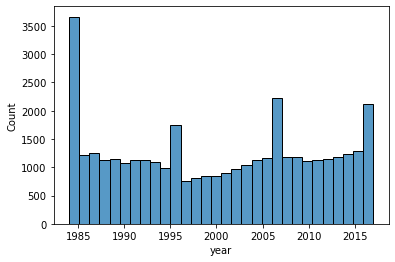

In [107]:
sns.histplot(df_clean.year)

In [108]:
df_clean.year.describe()

count    37832.000000
mean      2000.064971
std         10.391417
min       1984.000000
25%       1990.000000
50%       2001.000000
75%       2009.000000
max       2017.000000
Name: year, dtype: float64

In [109]:
## Creating bins
# bins to cut
bins = list(range(1980,2021,10))
# Name for each bin
labels = [f"{str(year)[-2:]}'s" for year in range(1980,2020,10)]
df_clean["decade"]=pd.cut(
    df_clean["year"],
    bins=bins,
    labels=labels
)

/Users/felipe/miniconda3/envs/ironhack/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


<AxesSubplot:xlabel='decade', ylabel='Count'>

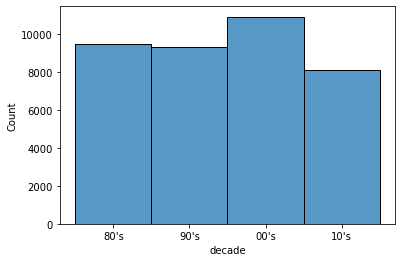

In [110]:
sns.histplot(df_clean["decade"])

In [162]:
df_by_years = df_clean.groupby("year").agg({"cylinders":["mean","median","min","max"], 
                                "make": lambda x:
                                 x.value_counts().index[0],
                                "hpv":"mean"})

In [163]:
df_by_years.columns

MultiIndex([('cylinders',     'mean'),
            ('cylinders',   'median'),
            ('cylinders',      'min'),
            ('cylinders',      'max'),
            (     'make', '<lambda>'),
            (      'hpv',     'mean')],
           )

/Users/felipe/miniconda3/envs/ironhack/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/felipe/miniconda3/envs/ironhack/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:label='52ff661a-d9c8-4cdc-8208-d15e61652985', xlabel='year', ylabel="('hpv', 'mean')">

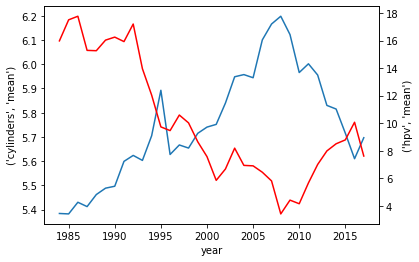

In [171]:
ax = plt.gca()
sns.lineplot(df_by_years.index,df_by_years[('cylinders','mean')])
ax2 = plt.twinx()
sns.lineplot(df_by_years.index,df_by_years[('hpv','mean')],color="red")
#sns.lineplot(df_by_years.index,df_by_years[('cylinders','median')],ax=ax)

## EXTRA
- With a clean version of the same dataset, let's go through a few different charts

In [177]:
df = pd.read_csv("data/vehicles.csv")

/Users/felipe/miniconda3/envs/ironhack/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


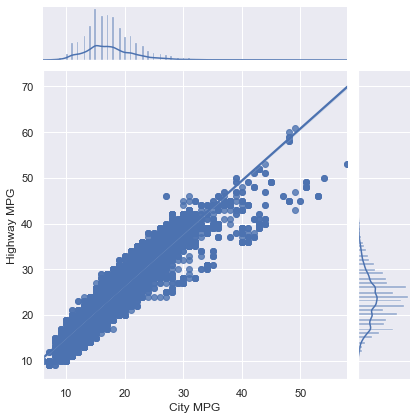

In [178]:
sns.jointplot("City MPG","Highway MPG",data=df, kind="reg")

<AxesSubplot:xlabel='Engine Displacement', ylabel='Fuel Type'>

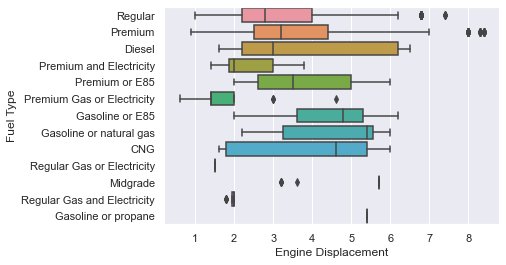

In [179]:
sns.boxplot(x="Engine Displacement", y="Fuel Type", data=df)

<AxesSubplot:xlabel='Cylinders', ylabel='City MPG'>

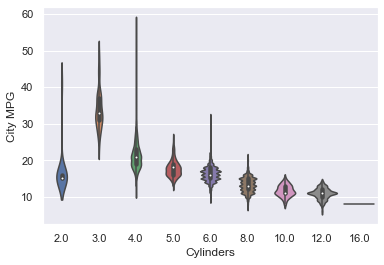

In [180]:
sns.violinplot(x="Cylinders", y="City MPG", data=df)

<AxesSubplot:xlabel='CO2 Emission Grams/Mile', ylabel='City MPG'>

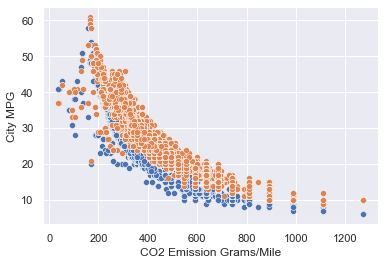

In [181]:
sns.scatterplot(x="CO2 Emission Grams/Mile", y="City MPG",data=df)
sns.scatterplot(x="CO2 Emission Grams/Mile", y="Highway MPG",data=df)